In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
np.random.seed(322)
fraud_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_2023.csv')

In [ ]:
#x = fraud_df.drop(['id','Class'],axis=1).values
y = fraud_df.Class.values
x = fraud_df.iloc[:,1:29].values
#x = fraud_df.iloc[:,12:14].values
z = fraud_df.iloc[:,12:14].values
print(y)

[0 0 0 ... 1 1 1]


x - все значения V1-V28
y - значения класса

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x,y,z,test_size=0.9)
#x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x,y,z,test_size=0.999)

In [ ]:
from sklearn.preprocessing import StandardScaler
x_train_std = StandardScaler().fit_transform(x_train)
x_test_std = StandardScaler().fit_transform(x_test)
z_train_std = StandardScaler().fit_transform(z_train)
z_test_std = StandardScaler().fit_transform(z_test)

In [ ]:
dtree_ = DecisionTreeClassifier (criterion='gini', max_depth=4, random_state=1)
dtree_.fit(x_train_std, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

-5.955249563355442


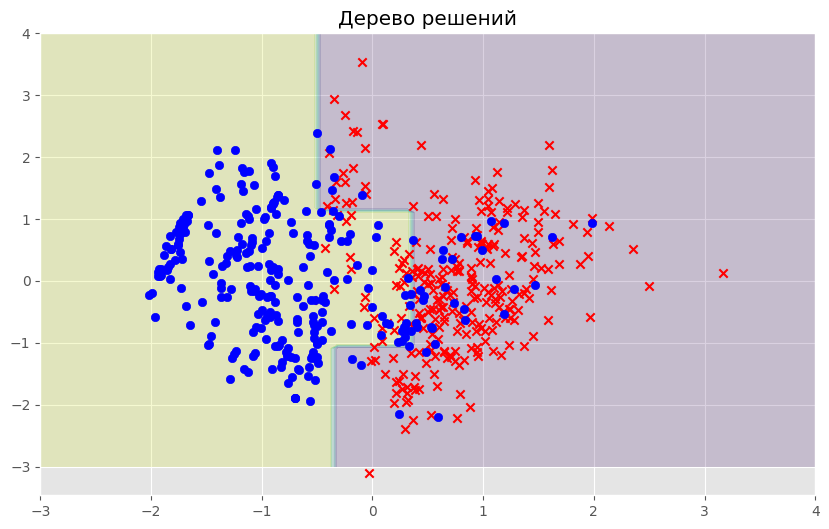

In [ ]:
from matplotlib import pyplot as plt

markers = ('x','o')
colors = ('red','blue')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
%matplotlib inline

x_range = np.linspace(-3, 4, 100)
xx1,xx2 = np.meshgrid(x_range,x_range)
y_hat = dtree_.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2, y_hat, alpha=0.2)
for l, c, m in zip(np.unique(y_train),colors,markers):
    plt.scatter(x_train_std[y_train == l, 0],
                x_train_std[y_train == l, 1], c=c, label = l, marker = m)
plt.title('Дерево решений')
plt.show()

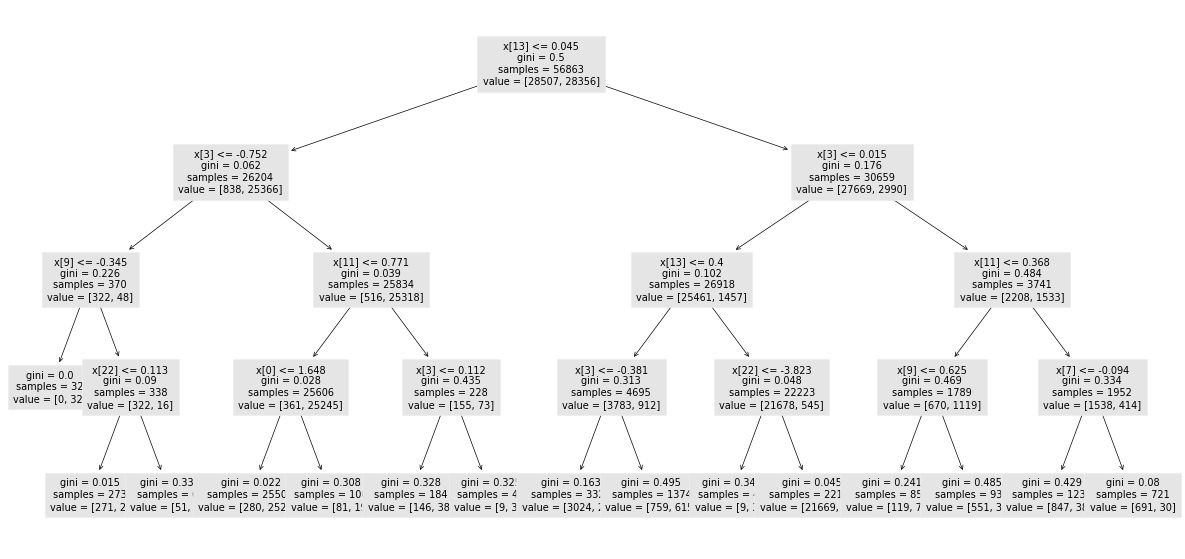

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(15,7))
tree.plot_tree(dtree_, fontsize=7)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
tree_ = dtree_
y_train_pred = tree_.predict (x_train)
y_test_pred = tree_.predict (x_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Меры правильности дерева принятия решений при обучении/испытании %.f/%.3f' % (tree_train, tree_test))

Меры правильности дерева принятия решений при обучении/испытании 1/0.951


In [ ]:
dtree_ = DecisionTreeClassifier (criterion='entropy', max_depth=4, random_state=1)
dtree_.fit(x_train_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

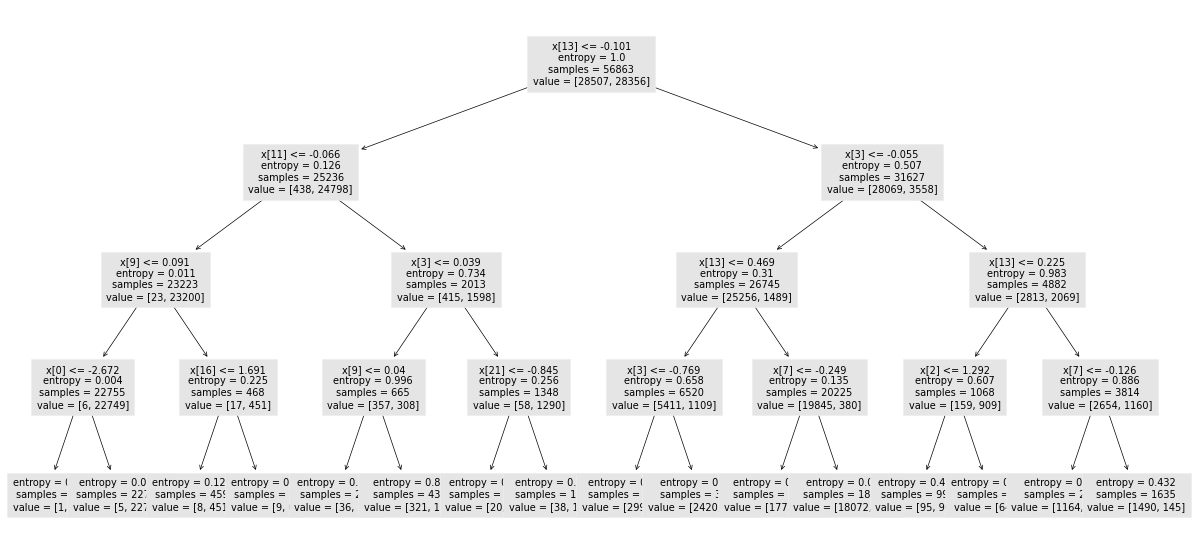

In [ ]:
fig = plt.figure(figsize=(15,7))
tree.plot_tree(dtree_, fontsize=7)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
tree_ = dtree_
y_train_pred = tree_.predict (x_train)
y_test_pred = tree_.predict (x_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Меры правильности дерева принятия решений при обучении/испытании %.f/%.3f' % (tree_train, tree_test))

Использование индекса Джини даёт немного лучший результат чем энтропия при использовании дерева решений. Для данного набора данных индекс Джинни является более подходящим критерием разделения.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_dtree = {
    'max_depth': [3, 5, 7, 10],
    'max_features': ['sqrt', 'log2']
}

dtree = DecisionTreeClassifier(random_state=42, criterion='gini')

grid_search_dtree = GridSearchCV(estimator=dtree, param_grid=param_grid_dtree, cv=5, scoring='accuracy')
grid_search_dtree.fit(x_train_std, y_train)

print("Лучшие параметры для дерева решений:", grid_search_dtree.best_params_)
print("Лучшие аккуратность для дерева решений:", grid_search_dtree.best_score_)

Лучшие параметры для дерева решений: {'max_depth': 10, 'max_features': 'sqrt'}
Лучшие аккуратность для дерева решений: 0.9698573325280989


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=42,criterion='gini', n_jobs=-1)
rf.fit(x_train_std,y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
tree_rf = rf
y_train_pred = tree_rf.predict (x_train)
y_test_pred = tree_rf.predict (x_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Меры правильности дерева принятия решений при обучении/испытании %.f/%.3f' % (tree_train, tree_test))

Меры правильности дерева принятия решений при обучении/испытании 1/0.999


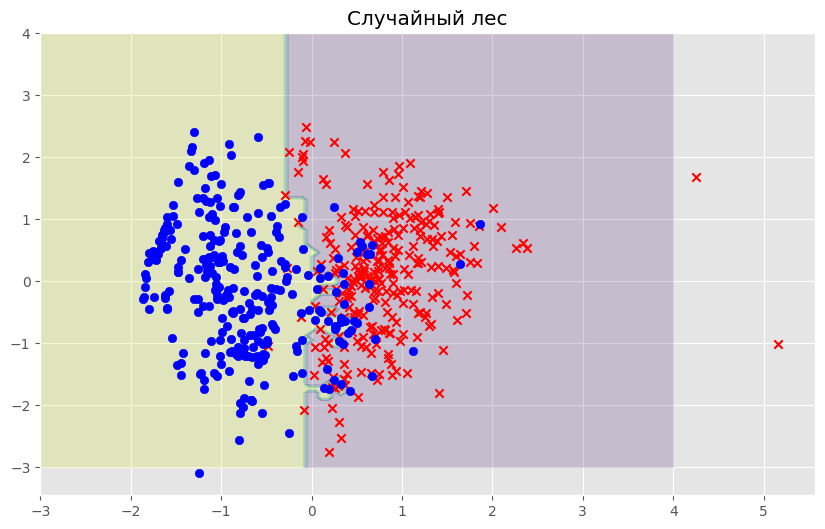

In [ ]:
from matplotlib import pyplot as plt

markers = ('x','o')
colors = ('red','blue')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
%matplotlib inline

x_range = np.linspace(-3, 4, 100)
xx1,xx2 = np.meshgrid(x_range,x_range)
y_hat = tree_rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2, y_hat, alpha=0.2)
for l, c, m in zip(np.unique(y_train),colors,markers):
    plt.scatter(x_train_std[y_train == l, 0],
                x_train_std[y_train == l, 1], c=c, label = l, marker = m)
plt.title('Случайный лес')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=42,criterion='entropy', n_jobs=-1)
rf.fit(x_train_std,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
tree_rf = rf
y_train_pred = tree_rf.predict (x_train)
y_test_pred = tree_rf.predict (x_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Меры правильности дерева принятия решений при обучении/испытании %.f/%.3f' % (tree_train, tree_test))

Меры правильности дерева принятия решений при обучении/испытании 1/0.999


Случайный лес даёт высокую точность с любым критерием разделения. Для этого датасета лучше использовать случайный лес.

1. Какие задачи решают с использованием алгоритмов на основе деревьев решений?

  - Алгоритмы на основе деревьев решений решают задачи классификации и регрессии, а также могут использоваться для задачи кластеризации.

2. Какие преимущества использования деревьев решений существуют?

  - Преимущества использования деревьев решений включают их простоту интерпретации, способность работать с различными типами данных, включая категориальные, а также их относительную высокую скорость обучения и предсказания.

3. Перечислите меры загрязненности (критерии разбиения), которые обычно применяются в деревьях принятия решений.
  - В качестве мер загрязненности, или критериев разбиения, часто используются энтропия Шеннона и индекс Джини.

4. Является ли маштабирование признаков обязательным требованием для алгоритмов на основе деревьев решений? Обоснуйте свой ответ.
  - Масштабирование признаков не является обязательным требованием для алгоритмов на основе деревьев решений, так как они не зависят от масштаба признаков.

5. С какой целью устанавливают предел максимальной грубины дерева?
  - Предел максимальной глубины дерева устанавливается с целью предотвращения переобучения модели и улучшения ее обобщающей способности.

6. В чем разница между информационной энтропией и индесом Джини?
  - Информационная энтропия и индекс Джини являются различными мерами неопределенности в данных. Информационная энтропия основана на теории информации и измеряет степень неопределенности в наборе данных, а индекс Джини измеряет вероятность неправильной классификации случайно выбранного элемента, если он был бы классифицирован случайным образом.